In [6]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
import config

class MapDataset(Dataset):
    def __init__(self, root_dir):
        super().__init__()

        self.root_dir = root_dir
        self.list_files = os.listdir(root_dir)
        print(self.list_files)
    
    def __len__(self):
        return len(self.list_files)
    
    def __getitem__(self, index):
        image_path = self.list_files[index]
        file_path = os.path.join(self.root_dir, image_path)
        image = np.array(Image.open(file_path))
        input_image = image[:, :256, :]
        inter_image = image[:, 256:512, :]
        target_image = image[:, 512:, :]

        input_image = config.transform_only_input(image=input_image)["image"]
        inter_image = config.transform_only_input(image=inter_image)["image"]
        target_image = config.transform_only_mask(image=target_image)["image"]

        return input_image, inter_image, target_image

In [31]:
dataset = MapDataset("data/maps/train/")
dl = DataLoader(dataset)
dl

['63.jpg', '823.jpg', '189.jpg', '77.jpg', '837.jpg', '638.jpg', '604.jpg', '162.jpg', '176.jpg', '88.jpg', '610.jpg', '348.jpg', '360.jpg', '406.jpg', '412.jpg', '374.jpg', '1019.jpg', '599.jpg', '1025.jpg', '1031.jpg', '228.jpg', '214.jpg', '572.jpg', '566.jpg', '200.jpg', '957.jpg', '943.jpg', '994.jpg', '758.jpg', '980.jpg', '770.jpg', '764.jpg', '765.jpg', '771.jpg', '981.jpg', '759.jpg', '995.jpg', '942.jpg', '956.jpg', '567.jpg', '201.jpg', '215.jpg', '573.jpg', '229.jpg', '1030.jpg', '1024.jpg', '598.jpg', '1018.jpg', '413.jpg', '375.jpg', '361.jpg', '407.jpg', '349.jpg', '177.jpg', '611.jpg', '89.jpg', '605.jpg', '163.jpg', '639.jpg', '188.jpg', '836.jpg', '76.jpg', '822.jpg', '62.jpg', '74.jpg', '834.jpg', '60.jpg', '820.jpg', '48.jpg', '808.jpg', '149.jpg', '613.jpg', '175.jpg', '161.jpg', '607.jpg', '388.jpg', '439.jpg', '377.jpg', '411.jpg', '405.jpg', '363.jpg', '1032.jpg', '1026.jpg', '559.jpg', '203.jpg', '565.jpg', '571.jpg', '217.jpg', '940.jpg', '798.jpg', '954.jpg',

In [36]:
next(iter(dataset))[1].shape

torch.Size([3, 256, 256])

In [7]:
dataset = MapDataset("Image_dataset/Train")
loader = DataLoader(dataset, batch_size=5)
for x, z, y in loader:
    print(x.shape)
    save_image(x, "x.png")
    save_image(z, "z.png")
    save_image(y, "y.png")
    break

['_01341.jpg', '_01427.jpg', '_00739.jpg', '_01433.jpg', '_01355.jpg', '_00063.jpg', '_00705.jpg', '_02112.jpg', '_02106.jpg', '_00711.jpg', '_00077.jpg', '_01369.jpg', '_01382.jpg', '_00922.jpg', '_00936.jpg', '_01396.jpg', '_00088.jpg', '_01625.jpg', '_01143.jpg', '_01157.jpg', '_00249.jpg', '_02338.jpg', '_01631.jpg', '_02310.jpg', '_00507.jpg', '_01619.jpg', '_00261.jpg', '_02476.jpg', '_02462.jpg', '_00275.jpg', '_00513.jpg', '_02304.jpg', '_01180.jpg', '_02489.jpg', '_01194.jpg', '_01802.jpg', '_01816.jpg', '_01751.jpg', '_01989.jpg', '_02258.jpg', '_00329.jpg', '_01037.jpg', '_01023.jpg', '_01745.jpg', '_02264.jpg', '_00473.jpg', '_00315.jpg', '_02502.jpg', '_02516.jpg', '_00301.jpg', '_01779.jpg', '_00467.jpg', '_02270.jpg', '_01792.jpg', '_00498.jpg', '_01786.jpg', '_01976.jpg', '_01962.jpg', '_01235.jpg', '_01553.jpg', '_00895.jpg', '_00659.jpg', '_01547.jpg', '_00881.jpg', '_01221.jpg', '_01209.jpg', '_00117.jpg', '_00671.jpg', '_02066.jpg', '_02072.jpg', '_00665.jpg', '_001

In [44]:
x[0].shape

torch.Size([3, 256, 256])

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

orignal_size = 600
standard_size = 256

image_pth = "image_dataset/drones/train/0.jpg"

input = np.array(Image.open(image_pth))[:, :orignal_size, ...]
# inter = np.array(Image.open(image_pth))[:, orignal_size:orignal_size*2, ...]
target = np.array(Image.open(image_pth))[:, orignal_size:, ...]

In [11]:
import os
os.listdir("image_dataset/drones/train")

['4.jpg', '5.jpg', '6.jpg', '2.jpg', '3.jpg', '1.jpg', '0.jpg']

In [9]:
import numpy as np
from utils import image_to_line_art

canvas = np.zeros((256, 256*3, 3), dtype=np.uint8)

input_resized = cv2.resize(input, (standard_size, standard_size))
line_art_resized = cv2.resize(image_to_line_art(target), (standard_size, standard_size))
target_resized = cv2.resize(target, (standard_size, standard_size))

canvas[:, :standard_size, ...] = input_resized
canvas[:, standard_size:standard_size*2, ...] = line_art_resized
canvas[:, standard_size*2:, ...] = target_resized

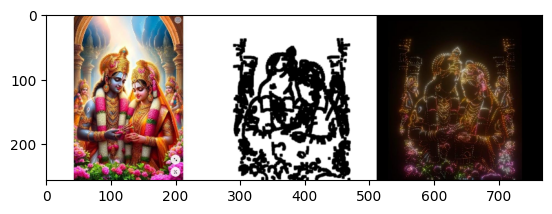

In [10]:
plt.imshow(canvas)

In [13]:
plt.imsave("text.jpg", canvas)

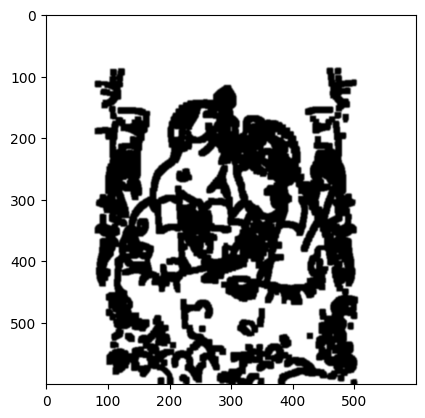

In [25]:
plt.imshow(image_to_line_art(target), cmap="gray")